In [94]:
import pandas as pd
import numpy as np

### Bases de données

On utilise une base de données "valeur_ajoutee_gen" donnant les valeurs ajoutées de différents lycées. On utilise également une base "ips_1" obtenue avec l'API de data.gouv, que l'on couple avec ips_2, également de data.gouv.

In [95]:
valeur_ajoutee_gen = pd.read_csv('fr-en-indicateurs-de-resultat-des-lycees-denseignement-general-et-technologique.csv', low_memory = False, delimiter = ';').dropna(axis=1, how='all')

#### Traitement de la base valeur_ajoutee_gen :

In [98]:
valeur_ajoutee_gen = valeur_ajoutee_gen.drop_duplicates()
ips.rename(columns = {'UAI' : 'code_etablissement'}, inplace = True)
valeur_ajoutee_gen

,Etablissement,Annee,Ville,UAI,Code commune,Academie,Departement,Secteur,Presents - L,Presents - ES,...,Taux de mentions - Gnle,Valeur ajoutée du taux de mentions - Gnle,Nombre de mentions TB avec félicitations - G,Nombre de mentions TB sans félicitations - G,Nombre de mentions B - G,Nombre de mentions AB - G,Nombre de mentions TB avec félicitations - T,Nombre de mentions TB sans félicitations - T,Nombre de mentions B - T,Nombre de mentions AB - T
0,LYCEE LA CROIX BLANCHE,2016,BONDUES,0592935V,59090,LILLE,NORD,privé sous contrat,15.0,70.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LYCEE THEOPHILE LEGRAND (GENERAL ET TECHNO.),2016,LOUVROIL,0593034C,59365,LILLE,NORD,privé sous contrat,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,LYCEE DU NOORDOVER,2016,GRANDE SYNTHE,0595616J,59271,LILLE,NORD,public,41.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INSTITUT SAINT VINCENT DE PAUL (GENERAL ET TEC...,2016,LOOS,0595657D,59360,LILLE,NORD,privé sous contrat,16.0,26.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,LYCEE JEAN PROUVE,2016,LOMME,0595786U,59350,LILLE,NORD,public,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,LYCEE CHATEAU BLANC,2022,CHALETTE SUR LOING,0451442Y,45068,ORLEANS-TOURS,LOIRET,public,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0
1697,LYCEE JACQUES MONOD,2022,SAINT JEAN DE BRAYE,0451462V,45284,ORLEANS-TOURS,LOIRET,public,NaN,NaN,...,69.0,-3.0,10.0,55.0,80.0,96.0,2.0,6.0,18.0,23.0
1698,LYCEE STENDHAL,2022,AIGUILLON,0470009E,47004,BORDEAUX,LOT ET GARONNE,public,NaN,NaN,...,67.0,-3.0,1.0,13.0,20.0,34.0,NaN,2.0,6.0,15.0
1699,LYCEE EMILE PEYTAVIN,2022,MENDE,0480009Z,48095,MONTPELLIER,LOZERE,public,NaN,NaN,...,79.0,3.0,NaN,10.0,18.0,10.0,NaN,NaN,13.0,13.0


On supprime les colonnes de "valeur_ajoutee_gen" qui ont plus de 40% de valeurs manquantes, ainsi que les colonnes qui ne sont pas intéressantes à notre étude :

In [104]:
pourcentage_valeurs_present_gen = (valeur_ajoutee_gen.count()/len(valeur_ajoutee_gen))
inf_seuil_gen = [i for i in range(len(pourcentage_valeurs_present_gen)) if pourcentage_valeurs_present_gen[i] < 0.60]
columns = valeur_ajoutee_gen.columns
print(columns[inf_seuil_gen])

Index([], dtype='object')


C:\Users\ryaut\AppData\Local\Temp\ipykernel_18952\3337817279.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  inf_seuil_gen = [i for i in range(len(pourcentage_valeurs_present_gen)) if pourcentage_valeurs_present_gen[i] < 0.60]


In [105]:
valeur_ajoutee_gen = valeur_ajoutee_gen.drop(columns[inf_seuil_gen], axis = 1)

In [110]:
columnsToDrop = ['Etablissement', 'Presents - L', 'Presents - ES', 'Presents - S', 'Presents - Toutes series',
                 'Effectif de seconde', 'Effectif de premiere']
valeur_ajoutee_gen = valeur_ajoutee_gen.drop(columnsToDrop, axis = 1)

In [111]:
valeur_ajoutee_gen

,Annee,Ville,UAI,Code commune,Academie,Departement,Secteur,Taux de reussite - L,Taux de reussite - ES,Taux de reussite - S,...,Region,Code region,Code departement,Libelle departement,Valeur ajoutee du taux de reussite - Toutes series,Valeur ajoutee du taux d'acces 2nde-bac,Valeur ajoutee du taux de reussite - L,Valeur ajoutee du taux de reussite - ES,Valeur ajoutee du taux de reussite - S,Valeur ajoutee du taux d'acces 1ere-bac
0,2016,BONDUES,0592935V,59090,LILLE,NORD,privé sous contrat,100.0,99.0,97.0,...,HAUTS-DE-FRANCE,32,59,Nord,1,0,3,2,0,-2
1,2016,LOUVROIL,0593034C,59365,LILLE,NORD,privé sous contrat,NaN,NaN,67.0,...,HAUTS-DE-FRANCE,32,59,Nord,5,7,NaN,NaN,ND,-5
2,2016,GRANDE SYNTHE,0595616J,59271,LILLE,NORD,public,95.0,84.0,88.0,...,HAUTS-DE-FRANCE,32,59,Nord,1,1,6,-2,0,2
3,2016,LOOS,0595657D,59360,LILLE,NORD,privé sous contrat,94.0,85.0,84.0,...,HAUTS-DE-FRANCE,32,59,Nord,-3,-10,0,-5,-5,-3
4,2016,LOMME,0595786U,59350,LILLE,NORD,public,NaN,NaN,75.0,...,HAUTS-DE-FRANCE,32,59,Nord,-2,14,NaN,NaN,-7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,2022,CHALETTE SUR LOING,0451442Y,45068,ORLEANS-TOURS,LOIRET,public,NaN,NaN,NaN,...,CENTRE-VAL DE LOIRE,24,45,Loiret,-7,-1,NaN,NaN,NaN,-7
1697,2022,SAINT JEAN DE BRAYE,0451462V,45284,ORLEANS-TOURS,LOIRET,public,NaN,NaN,NaN,...,CENTRE-VAL DE LOIRE,24,45,Loiret,-2,-4,NaN,NaN,NaN,2
1698,2022,AIGUILLON,0470009E,47004,BORDEAUX,LOT ET GARONNE,public,NaN,NaN,NaN,...,NOUVELLE-AQUITAINE,75,47,Lot-et-Garonne,1,-1,NaN,NaN,NaN,-3
1699,2022,MENDE,0480009Z,48095,MONTPELLIER,LOZERE,public,NaN,NaN,NaN,...,OCCITANIE,76,48,Lozère,1,-1,NaN,NaN,NaN,-5


#### Traitement des bases de données ips :

In [112]:
ips_1 = pd.read_csv("ips.csv")
ips_2 = pd.read_csv("fr-en-ips_lycees.csv", delimiter = ';')

In [115]:
ips = pd.concat([ips_1, ips_2], ignore_index=True)
ips = ips.drop(['effectifs_voie_gt', 'effectifs_voie_pro', 'effectifs_ensemble_gt_pro', 'nom_de_l_etablissment', 'type_de_lycee'],
               axis = 1)
ips = ips.drop_duplicates()
ips

,rentree_scolaire,academie,code_du_departement,departement,uai,code_insee_de_la_commune,nom_de_la_commune,secteur,ips_voie_gt,ips_voie_pro,ips_ensemble_gt_pro,ecart_type_de_l_ips_voie_gt,ecart_type_de_l_ips_voie_pro
0,2022-2023,LYON,1.0,AIN,0010001W,1004.0,AMBERIEU EN BUGEY,public,NaN,91.5,91.5,NaN,27.2
1,2022-2023,LYON,1.0,AIN,0010006B,1033.0,VALSERHONE,public,99.2,84.2,93.6,33.3,24.8
2,2022-2023,LYON,1.0,AIN,0010013J,1053.0,BOURG EN BRESSE,public,123.0,NaN,123.0,34.7,NaN
3,2022-2023,LYON,1.0,AIN,0010016M,1053.0,BOURG EN BRESSE,public,111.7,98.8,109.2,32.9,30.2
4,2022-2023,LYON,1.0,AIN,0010069V,1034.0,BELLEY,privé sous contrat,115.8,NaN,115.8,27.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25372,2018-2019,ROUEN,76.0,SEINE MARITIME,0762953X,76655.0,SAINT VALERY EN CAUX,public,108.0,NaN,108.0,NaN,NaN
25373,2018-2019,ROUEN,76.0,SEINE MARITIME,0763112V,76259.0,FECAMP,privé sous contrat,113.7,NaN,113.7,NaN,NaN
25374,2018-2019,CRETEIL,77.0,SEINE-ET-MARNE,0770918E,77014.0,AVON,public,113.2,87.1,103.7,NaN,NaN
25375,2018-2019,CRETEIL,77.0,SEINE-ET-MARNE,0770927P,77186.0,FONTAINEBLEAU,public,138.8,NaN,138.8,NaN,NaN


#### Merge des deux bases de données, obtention et traitement de la base de travail :

In [116]:
ips.rename(columns = {'uai' : 'code_etablissement'}, inplace = True)

In [117]:
valeur_ajoutee_gen.rename(columns = {'UAI' : 'code_etablissement'}, inplace = True)

In [137]:
ips_val = valeur_ajoutee_gen.merge(ips)

In [138]:
duplicatesColumns = ['academie', 'departement', 'code_insee_de_la_commune']
ips_val = ips_val.drop(duplicatesColumns, axis = 1)

On traite la base de données en raison de la présence de strings dans les valeurs : les colonnes seraient supprimées lors du merge.mean() sinon.

In [139]:
va = ['Valeur ajoutee du taux de reussite - Toutes series',
       "Valeur ajoutee du taux d'acces 2nde-bac",
       'Valeur ajoutee du taux de reussite - L',
       'Valeur ajoutee du taux de reussite - ES',
       'Valeur ajoutee du taux de reussite - S']
for x in va :
    ips_val[x] = ips_val[x].replace('ND', np.nan)
    ips_val[x] = ips_val[x].astype(float)

In [235]:
ips_val['Code commune']

0        59090
1        59090
2        59090
3        59090
4        59090
         ...  
10118    45068
10119    45068
10120    45068
10121    45068
10122    45068
Name: Code commune, Length: 10123, dtype: object

In [140]:
numeric_columns = ips_val.select_dtypes(include=['number'])
numeric_columns['code_etablissement'] = ips_val['code_etablissement']
ips_val_merged = numeric_columns.groupby(['code_etablissement', 'Annee']).mean()

In [141]:
ips_val_merged

Taux de reussite - L  Taux de reussite - ES  \
code_etablissement Annee                                                
0010006B           2012                   67.0                   92.0   
0010013J           2012                   89.0                   89.0   
                   2017                   86.0                   99.0   
0010014K           2017                   96.0                   87.0   
0010032E           2012                   87.0                   93.0   
...                                        ...                    ...   
9741380G           2014                  100.0                   87.0   
9760125G           2013                    NaN                    NaN   
9760270P           2012                   54.0                   36.0   
9760316P           2012                   57.0                   61.0   
                   2018                   84.0                   79.0   

                          Taux de reussite - S  \
code_etablissement Annee                         
0010006B           2012                   91.0   
0010013J           2012                   93.0   
                   2017                   93.0   
0010014K           2017                   96.0   
0010032E           2012                   92.0   
...                                        ...   
9741380G           2014                   84.0   
9760125G           2013                   85.0   
9760270P           2012                   42.0   
9760316P           2012                   63.0   
                   2018                   83.0   

                          Taux de reussite - Toutes series  \
code_etablissement Annee                                     
0010006B           2012                               89.0   
0010013J           2012                               91.0   
                   2017                               93.0   
0010014K           2017                               93.0   
0010032E           2012                               91.0   
...                                                    ...   
9741380G           2014                               86.0   
9760125G           2013                               81.0   
9760270P           2012                               44.0   
9760316P           2012                               55.0   
                   2018                               75.0   

                          Taux de reussite attendu france - L  \
code_etablissement Annee                                        
0010006B           2012                                  90.0   
0010013J           2012                                  93.0   
                   2017                                  94.0   
0010014K           2017                                  94.0   
0010032E           2012                                  78.0   
...                                                       ...   
9741380G           2014                                  96.0   
9760125G           2013                                   NaN   
9760270P           2012                                   NaN   
9760316P           2012                                   NaN   
                   2018                                   NaN   

                          Taux de reussite attendu france - ES  \
code_etablissement Annee                                         
0010006B           2012                                   91.0   
0010013J           2012                                   92.0   
                   2017                                   94.0   
0010014K           2017                                   93.0   
0010032E           2012                                   85.0   
...                                                        ...   
9741380G           2014                                   80.0   
9760125G           2013                                    NaN   
9760270P           2012                                    NaN   
9760316P           2012                       

### Quelques statistiques descriptives :

In [142]:
import matplotlib.pyplot as plt

In [195]:
def taux_de_reussite_plot(taux_observe, taux_attendu, titre) :
    value_count_obs = ips_val_merged[taux_observe].value_counts()
    value_count_att = ips_val_merged[taux_attendu].value_counts()

    plt.figure(figsize = (15,8))

    plt.bar([value for value in value_count_obs.index], value_count_obs.values*100/len(ips_val_merged[taux_attendu]))
    plt.scatter([value for value in value_count_att.index], value_count_att.values*100/len(ips_val_merged[taux_attendu]), color = 'r')

    plt.title(titre)
    plt.xlabel("Taux de réussite des lycées")
    plt.ylabel("Pourcentage de lycées")
    plt.legend(['Taux attendu', 'Taux observé'])

    plt.show()

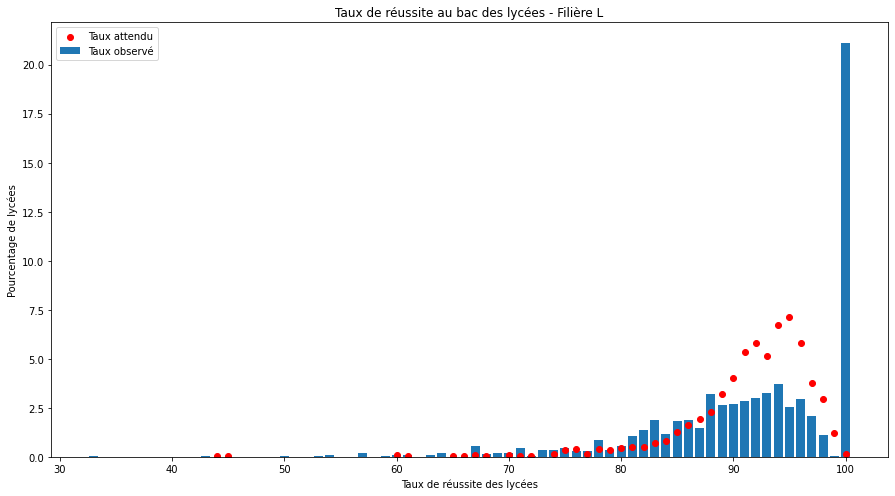

In [196]:
taux_de_reussite_plot('Taux de reussite - L', 'Taux de reussite attendu france - L', 'Taux de réussite au bac des lycées - Filière L')

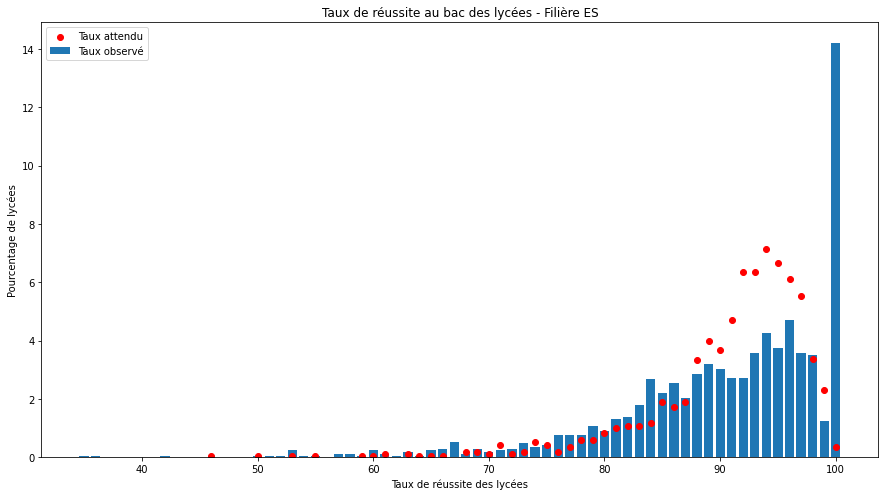

In [197]:
taux_de_reussite_plot('Taux de reussite - ES', 'Taux de reussite attendu france - ES', 'Taux de réussite au bac des lycées - Filière ES')

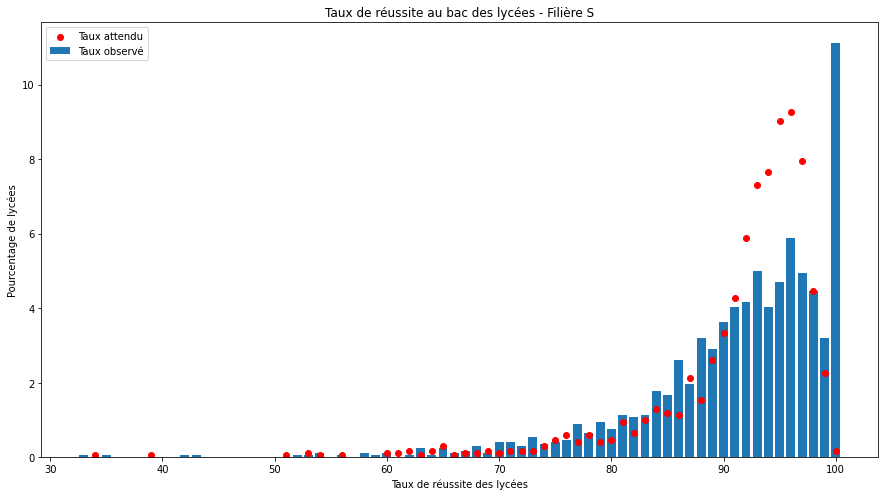

In [198]:
taux_de_reussite_plot('Taux de reussite - S', 'Taux de reussite attendu france - S', 'Taux de réussite au bac des lycées - Filière S')

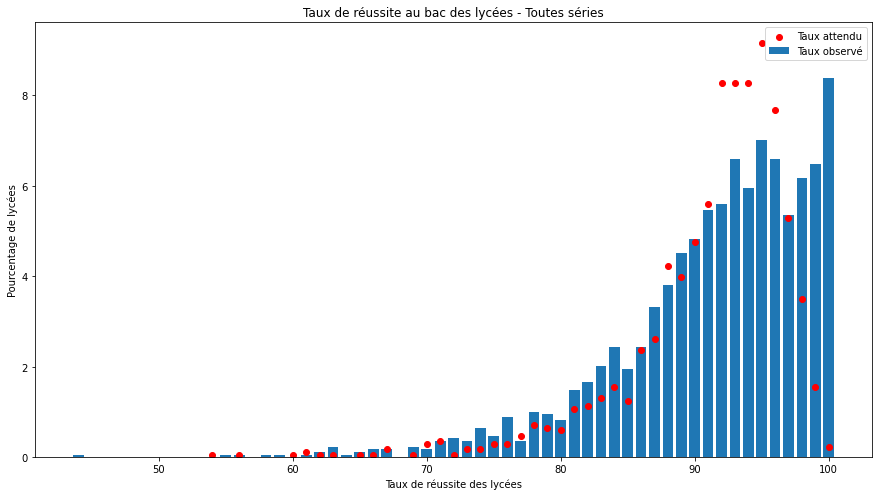

In [199]:
taux_de_reussite_plot('Taux de reussite - Toutes series', 'Taux de reussite attendu france - Toutes series', 'Taux de réussite au bac des lycées - Toutes séries')

On observe que les résultats observés sont conformes à ce qui est attendu jusqu'aux taux de réussite à 90%. Ensuite, il y a une nette surreprésentation de taux à 100%. Il semblerait que cette surreprésentation provienne des lycées dont on attendait des taux de réussite entre 90 et 99%.

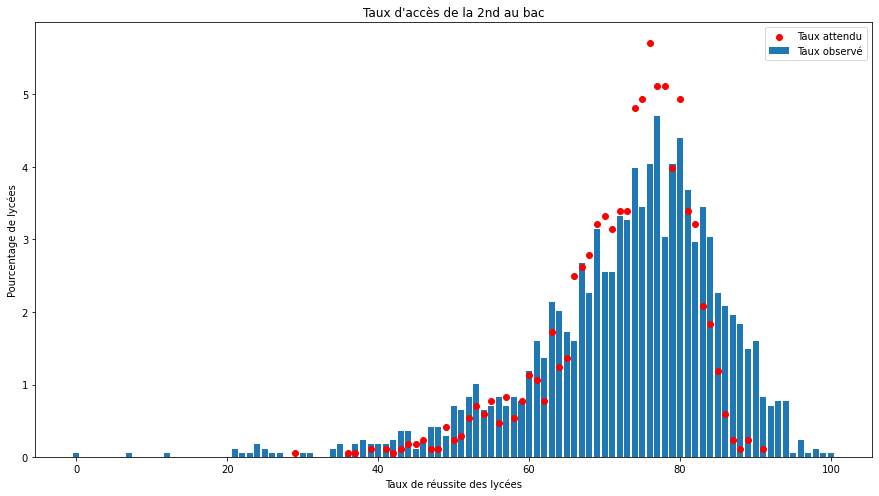

In [200]:
taux_de_reussite_plot("Taux d'acces 2nde-bac", "Taux d'acces attendu france 2nde-bac", "Taux d'accès de la 2nd au bac")

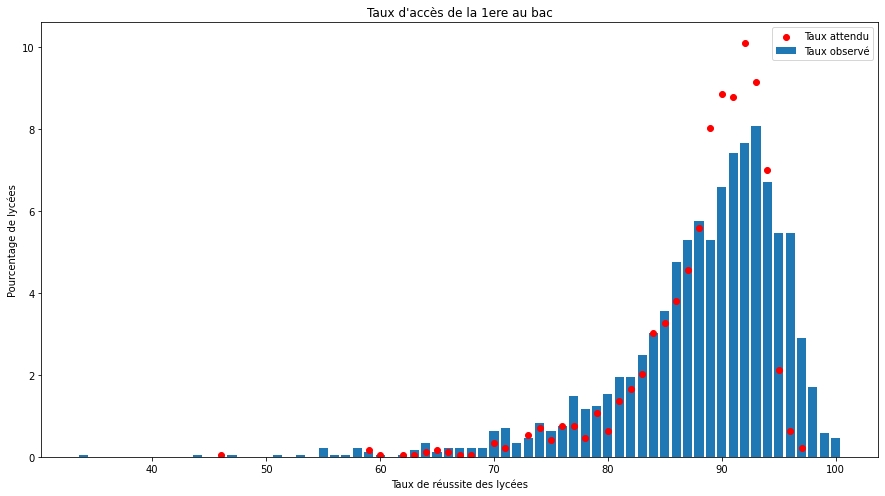

In [201]:
taux_de_reussite_plot("Taux d'acces 1ere-bac", "Taux d'acces attendu france 1ere-bac", "Taux d'accès de la 1ere au bac")

On observe les mêmes résultats que pour les résultats aux baccalauréats. Ainsi, il semblerait que ce soient les lycées les meilleurs qui arrivent le plus à faire progresser leurs élèves : ce sont ceux dont on attend de bons résultats qui réussissent à dépasser les espérances.

### Etude du lien entre l'IPS et le taux  de réussite au bac
On va s'intéresser d'abord à l'ips (indice de position sociale) des lycées et du lien avec la réussite au bac.

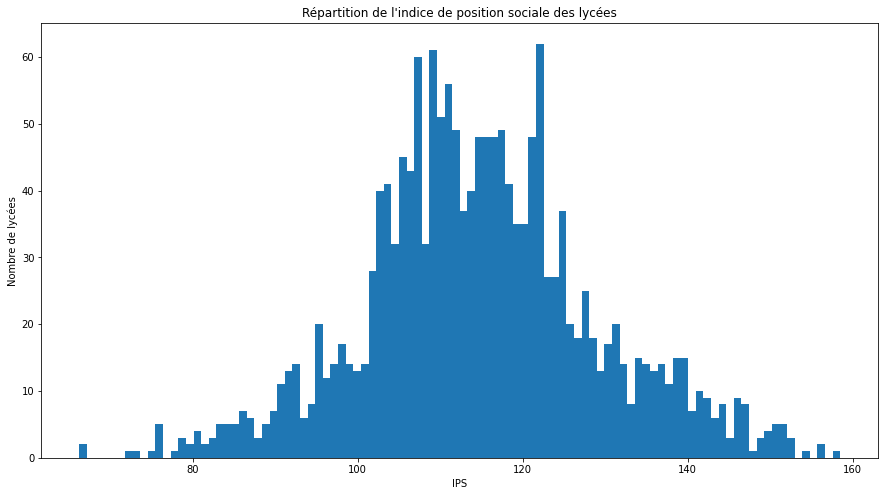

In [264]:
plt.figure(figsize = (15,8))

plt.hist(ips_val_merged['ips_voie_gt'], bins = 100)

plt.title("Répartition de l'indice de position sociale des lycées")
plt.xlabel("IPS")
plt.ylabel("Nombre de lycées")

plt.show()

In [91]:
import statsmodels.api as sm

In [194]:
ips_val_merged

Taux de reussite - L  Taux de reussite - ES  \
code_etablissement Annee                                                
0010006B           2012                   67.0                   92.0   
0010013J           2012                   89.0                   89.0   
                   2017                   86.0                   99.0   
0010014K           2017                   96.0                   87.0   
0010032E           2012                   87.0                   93.0   
...                                        ...                    ...   
9741380G           2014                  100.0                   87.0   
9760125G           2013                    NaN                    NaN   
9760270P           2012                   54.0                   36.0   
9760316P           2012                   57.0                   61.0   
                   2018                   84.0                   79.0   

                          Taux de reussite - S  \
code_etablissement Annee                         
0010006B           2012                   91.0   
0010013J           2012                   93.0   
                   2017                   93.0   
0010014K           2017                   96.0   
0010032E           2012                   92.0   
...                                        ...   
9741380G           2014                   84.0   
9760125G           2013                   85.0   
9760270P           2012                   42.0   
9760316P           2012                   63.0   
                   2018                   83.0   

                          Taux de reussite - Toutes series  \
code_etablissement Annee                                     
0010006B           2012                               89.0   
0010013J           2012                               91.0   
                   2017                               93.0   
0010014K           2017                               93.0   
0010032E           2012                               91.0   
...                                                    ...   
9741380G           2014                               86.0   
9760125G           2013                               81.0   
9760270P           2012                               44.0   
9760316P           2012                               55.0   
                   2018                               75.0   

                          Taux de reussite attendu france - L  \
code_etablissement Annee                                        
0010006B           2012                                  90.0   
0010013J           2012                                  93.0   
                   2017                                  94.0   
0010014K           2017                                  94.0   
0010032E           2012                                  78.0   
...                                                       ...   
9741380G           2014                                  96.0   
9760125G           2013                                   NaN   
9760270P           2012                                   NaN   
9760316P           2012                                   NaN   
                   2018                                   NaN   

                          Taux de reussite attendu france - ES  \
code_etablissement Annee                                         
0010006B           2012                                   91.0   
0010013J           2012                                   92.0   
                   2017                                   94.0   
0010014K           2017                                   93.0   
0010032E           2012                                   85.0   
...                                                        ...   
9741380G           2014                                   80.0   
9760125G           2013                                    NaN   
9760270P           2012                                    NaN   
9760316P           2012                       

                                   OLS Regression Results                                   
Dep. Variable:     Taux de reussite - Toutes series   R-squared:                       0.331
Model:                                          OLS   Adj. R-squared:                  0.331
Method:                               Least Squares   F-statistic:                     413.6
Date:                              Mon, 25 Dec 2023   Prob (F-statistic):          1.37e-146
Time:                                      18:15:10   Log-Likelihood:                -5343.2
No. Observations:                              1671   AIC:                         1.069e+04
Df Residuals:                                  1668   BIC:                         1.071e+04
Df Model:                                         2                                         
Covariance Type:                          nonrobust                                         
                                  coef    std err          t      P>|t

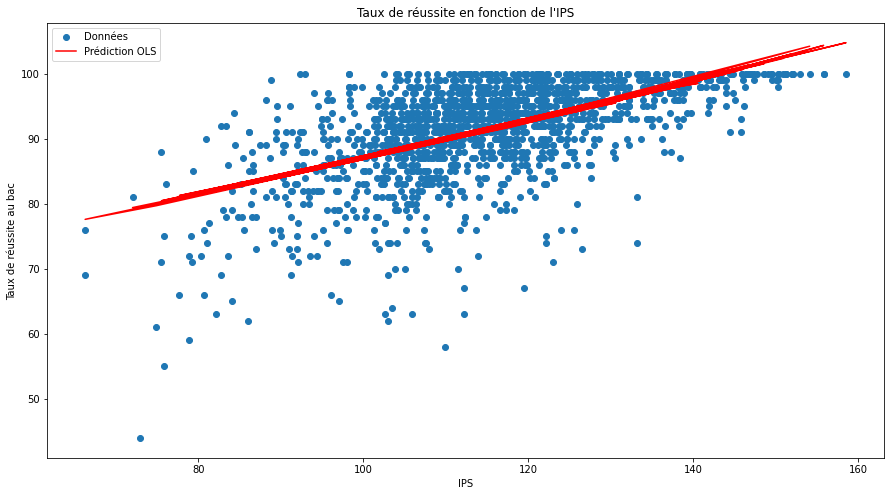

In [220]:
ips_reg = ips_val_merged[['ips_voie_gt', 'ecart_type_de_l_ips_voie_gt', 'Taux de reussite - Toutes series']].dropna()
X = ips_reg[['ips_voie_gt', 'ecart_type_de_l_ips_voie_gt']]
y = ips_reg['Taux de reussite - Toutes series']


# Ajout d'une colonne de 1 pour le terme constant (biais)
X = sm.add_constant(X)

# Création du modèle OLS
model = sm.OLS(y, X)

# Entraînement du modèle
results = model.fit()

# Affichage des résultats de la régression
print(results.summary())

# Tracer la régression
plt.figure(figsize = (15,8))
plt.scatter(X['ips_voie_gt'], y, label='Données')
plt.plot(X['ips_voie_gt'], results.predict(X), color='red', label='Prédiction OLS')
plt.xlabel('IPS')
plt.ylabel('Taux de réussite au bac')
plt.title("Taux de réussite en fonction de l'IPS")
plt.legend()
plt.show()

ecart_type_de_l_ips_voie_gt n'est pas significatif. Il semblerait également que la régression ne soit pas purement linéaire.

                                   OLS Regression Results                                   
Dep. Variable:     Taux de reussite - Toutes series   R-squared:                       0.346
Model:                                          OLS   Adj. R-squared:                  0.346
Method:                               Least Squares   F-statistic:                     444.1
Date:                              Mon, 25 Dec 2023   Prob (F-statistic):          1.78e-155
Time:                                      18:15:26   Log-Likelihood:                -5354.2
No. Observations:                              1679   AIC:                         1.071e+04
Df Residuals:                                  1676   BIC:                         1.073e+04
Df Model:                                         2                                         
Covariance Type:                          nonrobust                                         
                  coef    std err          t      P>|t|      [0.025   

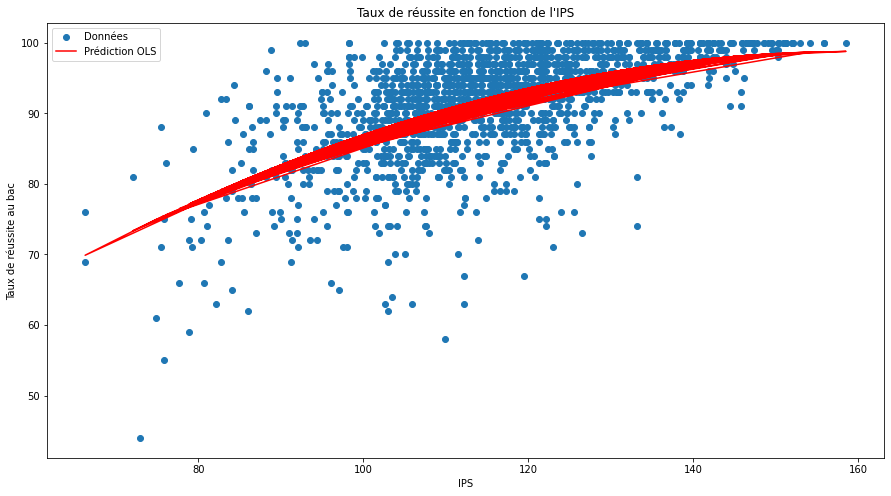

In [221]:
ips_reg = ips_val_merged[['ips_voie_gt', 'Taux de reussite - Toutes series']].dropna()
ips_reg['ips_carre'] = ips_reg['ips_voie_gt']**2
X = ips_reg[['ips_voie_gt', 'ips_carre']]
y = ips_reg['Taux de reussite - Toutes series']


# Ajout d'une colonne de 1 pour le terme constant (biais)
X = sm.add_constant(X)

# Création du modèle OLS
model = sm.OLS(y, X)

# Entraînement du modèle
results = model.fit()

# Affichage des résultats de la régression
print(results.summary())

# Tracer la régression
plt.figure(figsize = (15,8))
plt.scatter(X['ips_voie_gt'], y, label='Données')
plt.plot(X['ips_voie_gt'], results.predict(X), color='red', label='Prédiction OLS')
plt.xlabel('IPS')
plt.ylabel('Taux de réussite au bac')
plt.title("Taux de réussite en fonction de l'IPS")
plt.legend()
plt.show()

On obtient un résultat conforme à ce qui est attendu : les élèves issues de classes favorisées ont plus de réussite au baccalauréat. L'intérêt de l'IPS est de mesurer le capital de classe via la profession des parents, et non le capital économique. On introduit des variables d'ordre économique pour pouvoir séparer l'effet des deux (qui restent corrélées).

On importe des données de l'INSEE qui donnent des informations d'ordre économique au niveau communal. On va s'intéresser à la médiane des revenus par territoire.

In [229]:
eco = pd.read_excel("FILO2019_DISP_COM_ENS.xlsx", header = 4)
eco

,Code géographique,Libellé géographique,Nbre de ménages fiscaux,Nbre de personnes dans les ménages fiscaux,Nbre d'unités de consommation dans les ménages fiscaux,1er quartile (€),Médiane (€),3e quartile (€),Écart interquartile (€),1er décile (€),...,dont part des salaires et traitements(%),dont part des indemnités de chômage (%),dont part des revenus des activités non salariées (%),"Part des pensions, retraites et rentes (%)",Part des revenus du patrimoine et autres revenus (%),Part de l'ensemble des prestations sociales (%),dont part des prestations familiales (%),dont part des minima sociaux (%),dont part des prestations logement (%),Part des impôts (%)
0,CODGEO,LIBGEO,NBMEN19,NBPERS19,NBUC19,Q119,Q219,Q319,Q3_Q1,D119,...,PTSA19,PCHO19,PBEN19,PPEN19,PPAT19,PPSOC19,PPFAM19,PPMINI19,PPLOGT19,PIMPOT19
1,01001,L'Abergement-Clémenciat,322,819,542.7,NaN,23970,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01002,L'Abergement-de-Varey,113,263,177.2,NaN,23640,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01004,Ambérieu-en-Bugey,6711,15040,10296.8,14940,20510,27310,12370,11080,...,63.4,3.1,3.6,25.6,12.3,7.7,2.8,3.1,1.8,-15.7
4,01005,Ambérieux-en-Dombes,720,1823,1204.3,NaN,24050,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31357,97420,Sainte-Suzanne,8339,23843,15047.6,11270,16710,24620,13350,8630,...,66.1,4.6,7.7,12.3,4.5,16.9,4.6,9.2,3.1,-12.1
31358,97421,Salazie,2463,6927,4399.9,8960,12340,17250,8300,6540,...,45.5,6.8,9.4,14.1,4.3,28,6.3,18.4,3.3,-8.1
31359,97422,Le Tampon,30048,77963,50710.5,10790,15320,23210,12430,8140,...,53.5,5.3,7.7,20.1,7.3,18.2,4.5,10,3.7,-12.1
31360,97423,Les Trois-Bassins,2418,6982,4436.6,10820,15750,22410,11590,8280,...,61.4,6.5,7.4,14.3,4,17.4,4.3,11,2.1,-11


In [232]:
eco = eco[['Code géographique', 'Médiane (€)']]
eco = eco.drop(eco.index[0])
eco

,Code géographique,Médiane (€)
1,01001,23970
2,01002,23640
3,01004,20510
4,01005,24050
5,01007,23380
...,...,...
31357,97420,16710
31358,97421,12340
31359,97422,15320
31360,97423,15750


In [255]:
eco.rename(columns = {'Code géographique' : 'Code commune'}, inplace = True)
eco['Médiane (€)'] = eco['Médiane (€)'].astype(float)

In [256]:
ips_val_eco = ips_val.merge(eco)

In [257]:
numeric_columns = ips_val_eco.select_dtypes(include=['number'])
numeric_columns['code_etablissement'] = ips_val_eco['code_etablissement']
ips_val_eco_merged = numeric_columns.groupby(['code_etablissement', 'Annee']).mean()

In [258]:
ips_val_eco_merged

Taux de reussite - L  Taux de reussite - ES  \
code_etablissement Annee                                                
0010006B           2012                   67.0                   92.0   
0010013J           2012                   89.0                   89.0   
                   2017                   86.0                   99.0   
0010014K           2017                   96.0                   87.0   
0010032E           2012                   87.0                   93.0   
...                                        ...                    ...   
9741255W           2012                  100.0                  100.0   
                   2013                  100.0                  100.0   
9741263E           2013                   91.0                   81.0   
9741324W           2013                   81.0                   97.0   
9741380G           2014                  100.0                   87.0   

                          Taux de reussite - S  \
code_etablissement Annee                         
0010006B           2012                   91.0   
0010013J           2012                   93.0   
                   2017                   93.0   
0010014K           2017                   96.0   
0010032E           2012                   92.0   
...                                        ...   
9741255W           2012                   99.0   
                   2013                  100.0   
9741263E           2013                   95.0   
9741324W           2013                   84.0   
9741380G           2014                   84.0   

                          Taux de reussite - Toutes series  \
code_etablissement Annee                                     
0010006B           2012                               89.0   
0010013J           2012                               91.0   
                   2017                               93.0   
0010014K           2017                               93.0   
0010032E           2012                               91.0   
...                                                    ...   
9741255W           2012                               99.0   
                   2013                               98.0   
9741263E           2013                               93.0   
9741324W           2013                               85.0   
9741380G           2014                               86.0   

                          Taux de reussite attendu france - L  \
code_etablissement Annee                                        
0010006B           2012                                  90.0   
0010013J           2012                                  93.0   
                   2017                                  94.0   
0010014K           2017                                  94.0   
0010032E           2012                                  78.0   
...                                                       ...   
9741255W           2012                                  97.0   
                   2013                                  97.0   
9741263E           2013                                  93.0   
9741324W           2013                                  87.0   
9741380G           2014                                  96.0   

                          Taux de reussite attendu france - ES  \
code_etablissement Annee                                         
0010006B           2012                                   91.0   
0010013J           2012                                   92.0   
                   2017                                   94.0   
0010014K           2017                                   93.0   
0010032E           2012                                   85.0   
...                                                        ...   
9741255W           2012                                   96.0   
                   2013                                   97.0   
9741263E           2013                                   88.0   
9741324W           2013                       

On introduit le capital économique dans la régressionn via la médiane des revenus dans le département.

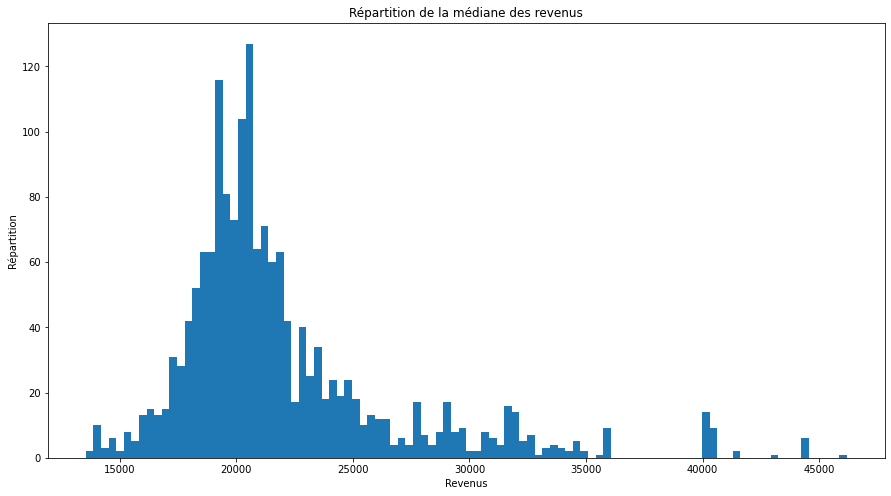

In [263]:
plt.figure(figsize = (15,8))

plt.hist(ips_val_eco_merged['Médiane (€)'], bins = 100)

plt.title('Répartition de la médiane des revenus')
plt.xlabel("Revenus")
plt.ylabel("Répartition")

plt.show()

                                   OLS Regression Results                                   
Dep. Variable:     Taux de reussite - Toutes series   R-squared:                       0.334
Model:                                          OLS   Adj. R-squared:                  0.333
Method:                               Least Squares   F-statistic:                     274.5
Date:                              Mon, 25 Dec 2023   Prob (F-statistic):          2.25e-144
Time:                                      19:53:40   Log-Likelihood:                -5202.1
No. Observations:                              1645   AIC:                         1.041e+04
Df Residuals:                                  1641   BIC:                         1.043e+04
Df Model:                                         3                                         
Covariance Type:                          nonrobust                                         
                  coef    std err          t      P>|t|      [0.025   

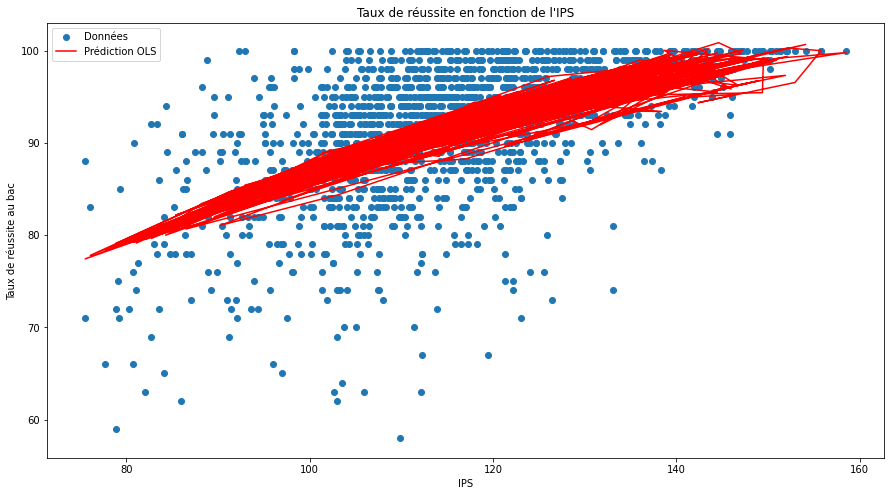

In [270]:
ips_reg = ips_val_eco_merged[['ips_voie_gt', 'Taux de reussite - Toutes series', 'Médiane (€)']].dropna()
ips_reg['ips_carre'] = ips_reg['ips_voie_gt']**2
X = ips_reg[['ips_voie_gt', 'ips_carre', 'Médiane (€)']]
y = ips_reg['Taux de reussite - Toutes series']


# Ajout d'une colonne de 1 pour le terme constant (biais)
X = sm.add_constant(X)

# Création du modèle OLS
model = sm.OLS(y, X)

# Entraînement du modèle
results = model.fit()

# Affichage des résultats de la régression
print(results.summary())

# Tracer la régression
plt.figure(figsize = (15,8))
plt.scatter(X['ips_voie_gt'], y, label='Données')
plt.plot(X['ips_voie_gt'], results.predict(X), color='red', label='Prédiction OLS')
plt.xlabel('IPS')
plt.ylabel('Taux de réussite au bac')
plt.title("Taux de réussite en fonction de l'IPS")
plt.legend()
plt.show()

### Etude du lien entre la valeur ajoutée et l'ips

On veut vérifier que ce sont bien les lycées les plus favorisés qui font le plus progresser leurs élèves.

In [272]:
ips_val_merged.columns

Index(['Taux de reussite - L', 'Taux de reussite - ES', 'Taux de reussite - S',
       'Taux de reussite - Toutes series',
       'Taux de reussite attendu france - L',
       'Taux de reussite attendu france - ES',
       'Taux de reussite attendu france - S',
       'Taux de reussite attendu france - Toutes series',
       'Taux d'acces 2nde-bac', 'Taux d'acces attendu france 2nde-bac',
       'Taux d'acces 1ere-bac', 'Taux d'acces attendu france 1ere-bac',
       'Code region', 'Valeur ajoutee du taux de reussite - Toutes series',
       'Valeur ajoutee du taux d'acces 2nde-bac',
       'Valeur ajoutee du taux de reussite - L',
       'Valeur ajoutee du taux de reussite - ES',
       'Valeur ajoutee du taux de reussite - S', 'code_du_departement',
       'ips_voie_gt', 'ips_voie_pro', 'ips_ensemble_gt_pro',
       'ecart_type_de_l_ips_voie_gt', 'ecart_type_de_l_ips_voie_pro'],
      dtype='object')

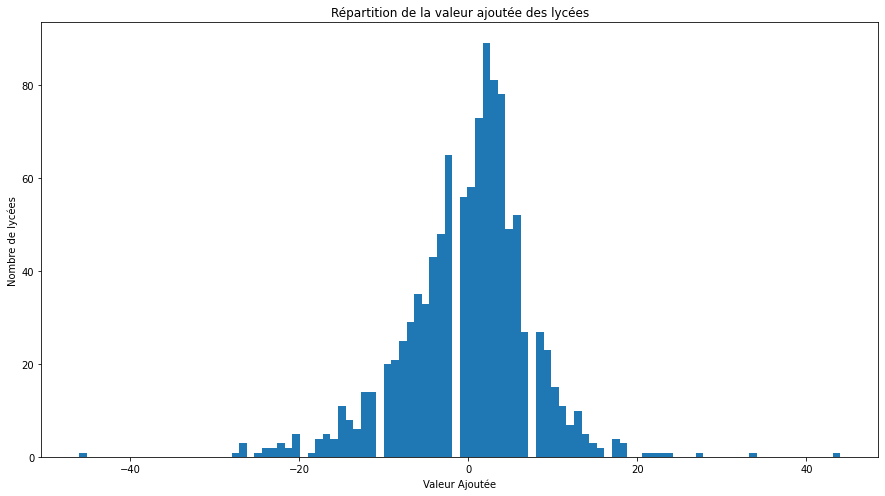

In [274]:
plt.figure(figsize = (15,8))

plt.hist(ips_val_merged['Valeur ajoutee du taux de reussite - L'], bins = 100)

plt.title("Répartition de la valeur ajoutée des lycées")
plt.xlabel("Valeur Ajoutée")
plt.ylabel("Nombre de lycées")

plt.show()

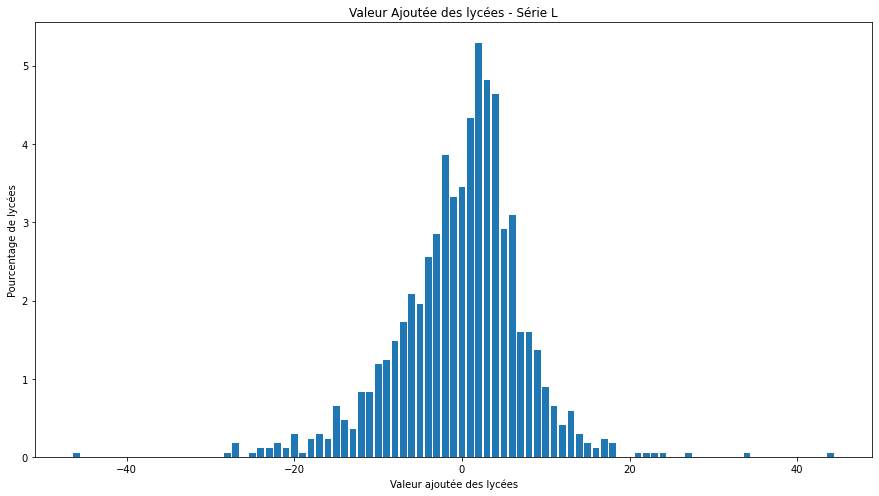

Médiane de la valeur ajoutée des lycées - Série L :  1.0
Moyenne de la valeur ajoutée des lycées - Série L :  -0.13259668508287292


In [286]:
value_count = ips_val_merged['Valeur ajoutee du taux de reussite - L'].value_counts()

plt.figure(figsize = (15,8))

plt.bar([value for value in value_count.index], value_count.values*100/len(ips_val_merged['Valeur ajoutee du taux de reussite - L']))

plt.title('Valeur Ajoutée des lycées - Série L')
plt.xlabel("Valeur ajoutée des lycées")
plt.ylabel("Pourcentage de lycées")

plt.show()

print("Médiane de la valeur ajoutée des lycées - Série L : ", ips_val_merged['Valeur ajoutee du taux de reussite - L'].median())
print("Moyenne de la valeur ajoutée des lycées - Série L : ", ips_val_merged['Valeur ajoutee du taux de reussite - L'].mean())

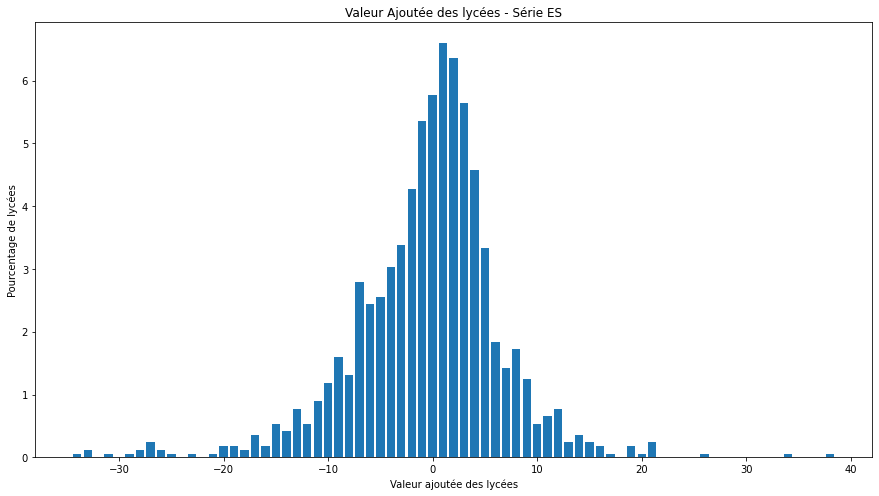

Médiane de la valeur ajoutée des lycées - Série ES :  0.0
Moyenne de la valeur ajoutée des lycées - Série ES :  -0.13259668508287292


In [289]:
value_count = ips_val_merged['Valeur ajoutee du taux de reussite - ES'].value_counts()

plt.figure(figsize = (15,8))

plt.bar([value for value in value_count.index], value_count.values*100/len(ips_val_merged['Valeur ajoutee du taux de reussite - ES']))

plt.title('Valeur Ajoutée des lycées - Série ES')
plt.xlabel("Valeur ajoutée des lycées")
plt.ylabel("Pourcentage de lycées")

plt.show()

print("Médiane de la valeur ajoutée des lycées - Série ES : ", ips_val_merged['Valeur ajoutee du taux de reussite - ES'].median())
print("Moyenne de la valeur ajoutée des lycées - Série ES : ", ips_val_merged['Valeur ajoutee du taux de reussite - L'].mean())

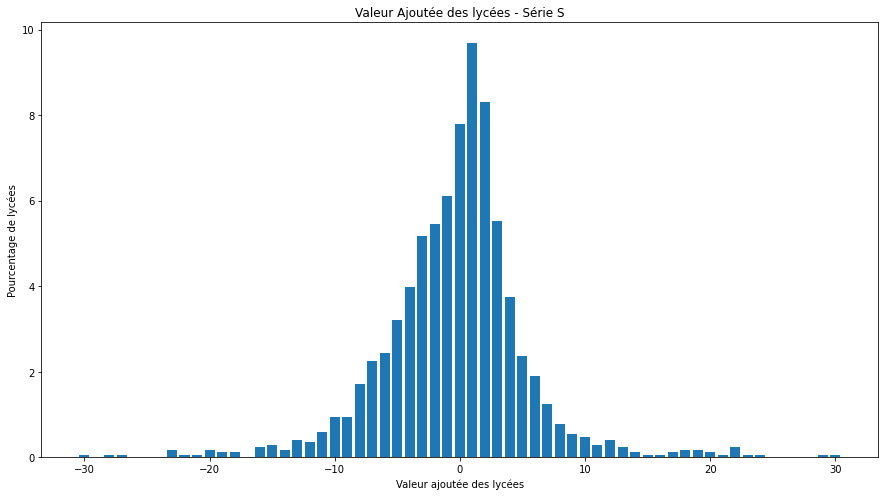

Médiane de la valeur ajoutée des lycées - Série ES :  0.0
Moyenne de la valeur ajoutée des lycées - Série ES :  -0.36505576208178436


In [290]:
value_count = ips_val_merged['Valeur ajoutee du taux de reussite - S'].value_counts()

plt.figure(figsize = (15,8))

plt.bar([value for value in value_count.index], value_count.values*100/len(ips_val_merged['Valeur ajoutee du taux de reussite - S']))

plt.title('Valeur Ajoutée des lycées - Série S')
plt.xlabel("Valeur ajoutée des lycées")
plt.ylabel("Pourcentage de lycées")

plt.show()

print("Médiane de la valeur ajoutée des lycées - Série ES : ", ips_val_merged['Valeur ajoutee du taux de reussite - S'].median())
print("Moyenne de la valeur ajoutée des lycées - Série ES : ", ips_val_merged['Valeur ajoutee du taux de reussite - S'].mean())

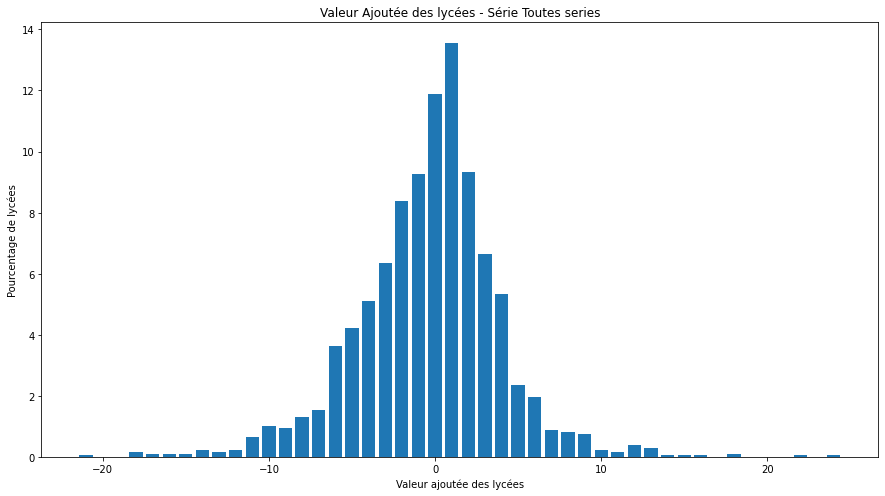

Médiane de la valeur ajoutée des lycées - Toutes series :  0.0
Moyenne de la valeur ajoutée des lycées - Toutes series :  -0.36800962116656644


In [292]:
value_count = ips_val_merged['Valeur ajoutee du taux de reussite - Toutes series'].value_counts()

plt.figure(figsize = (15,8))

plt.bar([value for value in value_count.index], value_count.values*100/len(ips_val_merged['Valeur ajoutee du taux de reussite - Toutes series']))

plt.title('Valeur Ajoutée des lycées - Série Toutes series')
plt.xlabel("Valeur ajoutée des lycées")
plt.ylabel("Pourcentage de lycées")

plt.show()

print("Médiane de la valeur ajoutée des lycées - Toutes series : ", ips_val_merged['Valeur ajoutee du taux de reussite - Toutes series'].median())
print("Moyenne de la valeur ajoutée des lycées - Toutes series : ", ips_val_merged['Valeur ajoutee du taux de reussite - Toutes series'].mean())

                                            OLS Regression Results                                            
Dep. Variable:     Valeur ajoutee du taux de reussite - Toutes series   R-squared:                       0.018
Model:                                                            OLS   Adj. R-squared:                  0.017
Method:                                                 Least Squares   F-statistic:                     10.17
Date:                                                Mon, 25 Dec 2023   Prob (F-statistic):           1.23e-06
Time:                                                        20:13:17   Log-Likelihood:                -4690.9
No. Observations:                                                1629   AIC:                             9390.
Df Residuals:                                                    1625   BIC:                             9411.
Df Model:                                                           3                                         
C

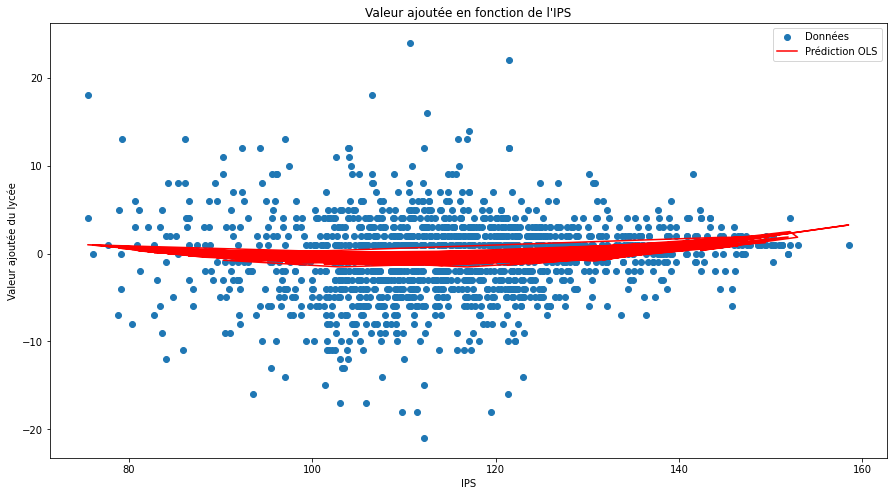

In [300]:
ips_reg = ips_val_eco_merged[['ips_voie_gt', 'Médiane (€)', 'Valeur ajoutee du taux de reussite - Toutes series']].dropna()
ips_reg['ips_carre'] = ips_reg['ips_voie_gt']**2
X = ips_reg[['ips_voie_gt', 'ips_carre', 'Médiane (€)']]
y = ips_reg['Valeur ajoutee du taux de reussite - Toutes series']


# Ajout d'une colonne de 1 pour le terme constant (biais)
X = sm.add_constant(X)

# Création du modèle OLS
model = sm.OLS(y, X)

# Entraînement du modèle
results = model.fit()

# Affichage des résultats de la régression
print(results.summary())

# Tracer la régression
plt.figure(figsize = (15,8))
plt.scatter(X['ips_voie_gt'], y, label='Données')
plt.plot(X['ips_voie_gt'], results.predict(X), color='red', label='Prédiction OLS')
plt.xlabel('IPS')
plt.ylabel('Valeur ajoutée du lycée')
plt.title("Valeur ajoutée en fonction de l'IPS")
plt.legend()
plt.show()

On décide d'observer ce qu'il se passe pour les lycées où le taux attendu de réussite est au-dessus de 90% :

In [303]:
merged_90 = ips_val_eco_merged[ips_val_eco_merged['Taux de reussite attendu france - Toutes series'] > 90]

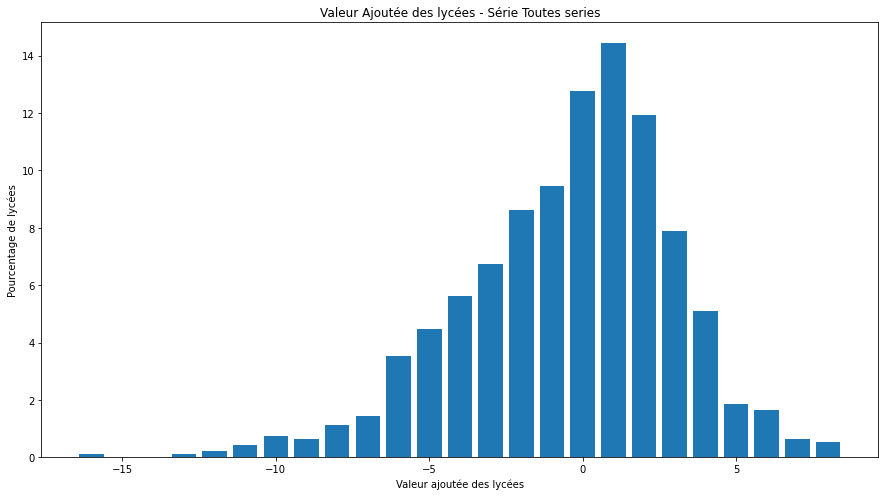

Médiane de la valeur ajoutée des lycées - Toutes series :  0.0
Moyenne de la valeur ajoutée des lycées - Toutes series :  -0.44963655244029077


In [304]:
value_count = merged_90['Valeur ajoutee du taux de reussite - Toutes series'].value_counts()

plt.figure(figsize = (15,8))

plt.bar([value for value in value_count.index], value_count.values*100/len(merged_90['Valeur ajoutee du taux de reussite - Toutes series']))

plt.title('Valeur Ajoutée des lycées - Série Toutes series')
plt.xlabel("Valeur ajoutée des lycées")
plt.ylabel("Pourcentage de lycées")

plt.show()

print("Médiane de la valeur ajoutée des lycées - Toutes series : ", merged_90['Valeur ajoutee du taux de reussite - Toutes series'].median())
print("Moyenne de la valeur ajoutée des lycées - Toutes series : ", merged_90['Valeur ajoutee du taux de reussite - Toutes series'].mean())

                                            OLS Regression Results                                            
Dep. Variable:     Valeur ajoutee du taux de reussite - Toutes series   R-squared:                       0.050
Model:                                                            OLS   Adj. R-squared:                  0.047
Method:                                                 Least Squares   F-statistic:                     16.87
Date:                                                Mon, 25 Dec 2023   Prob (F-statistic):           1.10e-10
Time:                                                        20:14:17   Log-Likelihood:                -2534.0
No. Observations:                                                 963   AIC:                             5076.
Df Residuals:                                                     959   BIC:                             5095.
Df Model:                                                           3                                         
C

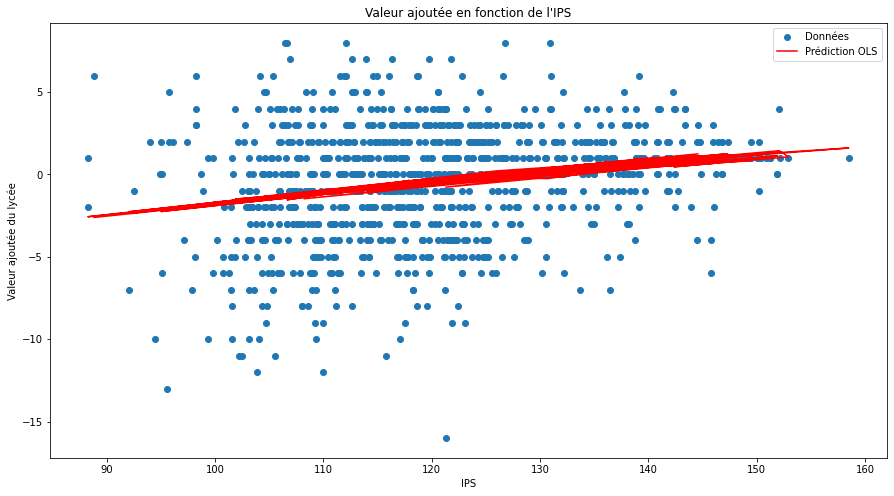

In [305]:
ips_reg = merged_90[['ips_voie_gt', 'Médiane (€)', 'Valeur ajoutee du taux de reussite - Toutes series']].dropna()
ips_reg['ips_carre'] = ips_reg['ips_voie_gt']**2
X = ips_reg[['ips_voie_gt', 'ips_carre', 'Médiane (€)']]
y = ips_reg['Valeur ajoutee du taux de reussite - Toutes series']


# Ajout d'une colonne de 1 pour le terme constant (biais)
X = sm.add_constant(X)

# Création du modèle OLS
model = sm.OLS(y, X)

# Entraînement du modèle
results = model.fit()

# Affichage des résultats de la régression
print(results.summary())

# Tracer la régression
plt.figure(figsize = (15,8))
plt.scatter(X['ips_voie_gt'], y, label='Données')
plt.plot(X['ips_voie_gt'], results.predict(X), color='red', label='Prédiction OLS')
plt.xlabel('IPS')
plt.ylabel('Valeur ajoutée du lycée')
plt.title("Valeur ajoutée en fonction de l'IPS")
plt.legend()
plt.show()

Hypothèse fausse.